# COGS 108 - TEAM 44: FINAL PROJECT

# Overview
Today we live in a society where businesses are greatly impacted by customer reviews and the location of where their businesses are. For some businesses, this can result in their success or failure. Looking to improve the experience for owners and customers, we used the yelp’s open-source dataset, _____, and _____ dataset to try to predict and determine what locations are better or worse for the chain Starbucks’ in California. It is important when opening a restaurant or a chain to consider where to open to make the most profit and build an image. Of course, when we look into Starbucks, we can tell that their goal is to open as many stores as they can. With our data analysis, however, we can hopefully give further insight to chains such as Starbucks to help them be the most efficient, even if they want to open as many stores as possible


# Group Member IDs and Names 

U08273331 Baichuan Tang

A14394510 Catherine Wang

A14881312 Jian Fan

A12426296 Kim Pham

A15212562 Ryan Eveloff

# Research Question

Our project sets out to predict *the best location(s) to open the next Starbucks*.
And to answer that question, we will be looking at Starbucks store data and how that maps to Census demographics to develop a "profile" (list of criteria) of a city where Starbucks is likely to expand its business. Using this "profile", we will produce a list of potential cities meeting those criteria.


# Background and Prior Work

Before diving into the real nitty-gritty code work, we did some research to best assist us. First, to stress the importance of our project, we looked at how Starbucks has been employing technology to its favor: in a recent <a href="https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/">collaboration</a> with Microsoft, they use machine learning to gather customer preferences, connecting coffeemakers in stores to the internet to blockchain services for tracing coffee. They are talking about the increased hiring of software engineers at companies outside the industry that are embracing high tech solutions. This is important for our project because we are using data science to figure out how the relationships and concepts we learn from our data can help a company and franchise like Starbucks. If we are able to find factors that affect and optimize a certain location for Starbucks to open, it can be really useful for companies that can benefit from data scientists and software engineers.
Fortunately a <a href="https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf">study</a> by Chungyu Institute of Technology provides us some pointers. It suggested that "Starbucks Coffee should also pay more attention to male, young customers who are under 35 years old, and consumers who have a high school diploma or equivalent and associate
degree for increasing market share." Therefore we will be analyzing factors such as gender, age, and education level to see if there's a correlation (if any) between certain demographics, the locations established by Starbucks, and its success in those locations.

Additionally, we found a similar <a href="https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA">project</a> in R done by Jordan Bean. He is someone that is naturally curious about how Starbucks think about location selection, and how their store locations can reveal their customer base and how they view locations as more attractive than others. His project is similar to our project in many ways because we also want to look into the locations of Starbucks. However, we want to focus on generating an idea of where Starbucks locations can be and are most successful, not necessarily what Starbucks themselves plan when choosing a location to open their stores. Jordan Bean usefully uses zip codes to differentiate locations of Starbucks just like us too. 

References (include links):
- 1) Starbucks' collaboration with Microsoft: https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/
- 2) Jordan Bean's article: https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA
- 3) Study: https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf

# Hypothesis


Our project primarily focuses on determining the relationship between Starbucks success in established locations and associated demographic factors such as gender, age, and education level. We predict that there will be a positive correlation among the factors stated above.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [9]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# 1) Data Cleaning
Data files:
    - Starbucks store_data.csv
    - Census 

## 1a) Starbucks: Load data
Import data into a DataFrame structure called `starbucks`

In [97]:
starbucks=pd.read_csv('store_data.csv',dtype={'Postcode':str})
starbucks

,Brand,Store Number,Store Name,Ownership Type,...,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,...,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
...,...,...,...,...,...,...,...,...,...
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,...,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,...,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
25599,Starbucks,47609-253286,Mall of Africa,Licensed,...,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


After an analysis of the data and seeing that the majority of Starbucks is in the US, we decided to direct our focus to predicting a US location

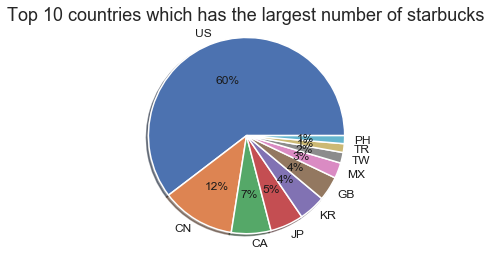

In [98]:
# top10 countries which has the largest number of starbucks
top10country=starbucks.groupby('Country').apply(lambda x:len(x)).sort_values(ascending=False)[:10]

plt.pie(top10country.values,labels=top10country.keys(),autopct='%.0f%%',
        textprops = {'fontsize':12, 'color':'k'},shadow=True)
plt.axis('equal')
plt.title("Top 10 countries which has the largest number of starbucks")
plt.show()

Narrow down all Starbucks to only Starbucks in the US and store the data in `df_US`

In [99]:
df_US=starbucks[starbucks['Country']=='US']
print("There are %s Starbucks in the US"%len(df_US))
df_US

There are 13608 Starbucks in the US


,Brand,Store Number,Store Name,Ownership Type,...,Phone Number,Timezone,Longitude,Latitude
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,...,907-339-0900,GMT-09:00 America/Anchorage,-149.78,61.21
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,...,907-339-2800,GMT-09:00 America/Anchorage,-149.84,61.14
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,...,907-339-1300,GMT-09:00 America/Anchorage,-149.85,61.11
...,...,...,...,...,...,...,...,...,...
25569,Starbucks,22425-219024,Laramie - Grand & 30th,Company Owned,...,307-742-3262,GMT-07:00 America/Denver,-105.56,41.31
25570,Starbucks,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,...,307-362-7145,GMT-07:00 America/Denver,-109.25,41.58
25571,Starbucks,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,...,307-672-5129,GMT-07:00 America/Denver,-106.94,44.77


Narrow down even more to have to table only contain information we need. In other words, drop columns "Brand" (obviously they're all Starbucks), "Phone Number", and "Timezone"

In [100]:
df_US = df_US.drop(columns=['Brand','Phone Number','Timezone'])
#reseting index to start from 0
df_US.reset_index(drop=True,inplace=True)
#Rename some columns to have simpler name
df_US=df_US.rename({'State/Province':'State','Postcode':'zip'}, axis='columns')
df_US

,Store Number,Store Name,Ownership Type,Street Address,...,Country,zip,Longitude,Latitude
0,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,...,US,995042300,-149.78,61.21
1,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,...,US,995073444,-149.84,61.14
2,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,...,US,995153596,-149.85,61.11
...,...,...,...,...,...,...,...,...,...
13605,22425-219024,Laramie - Grand & 30th,Company Owned,3021 Grand Ave,...,US,82070,-105.56,41.31
13606,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,118 Westland Way,...,US,829015751,-109.25,41.58
13607,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,2208 Coffeen Ave,...,US,828016213,-106.94,44.77


## 1b) Starbucks: Find missing data
Drop rows with missing data. We will try to minimize the number of rows dropped to maximize our prediction accuracy. Therefore we will only drop rows with missing data in the following columns "Store Number", "Ownership Type", "City", "State", and "Zip" because they are of importance to our analysis.

In [101]:
df_US = df_US.dropna(subset=['Store Number','Ownership Type','City','State','zip'])
df_US

,Store Number,Store Name,Ownership Type,Street Address,...,Country,zip,Longitude,Latitude
0,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,...,US,995042300,-149.78,61.21
1,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,...,US,995073444,-149.84,61.14
2,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,...,US,995153596,-149.85,61.11
...,...,...,...,...,...,...,...,...,...
13605,22425-219024,Laramie - Grand & 30th,Company Owned,3021 Grand Ave,...,US,82070,-105.56,41.31
13606,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,118 Westland Way,...,US,829015751,-109.25,41.58
13607,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,2208 Coffeen Ave,...,US,828016213,-106.94,44.77


## 1c) Starbucks: Standardize zip codes
We can see that some zips have 9 digits and some have 5. We will standardize them to have 5 digits

In [102]:
df_US.loc[:,'zip']=pd.Series([str(i)[:5] for i in df_US.loc[:,'zip']])
df_US

,Store Number,Store Name,Ownership Type,Street Address,...,Country,zip,Longitude,Latitude
0,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,...,US,99504,-149.78,61.21
1,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,...,US,99507,-149.84,61.14
2,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,...,US,99515,-149.85,61.11
...,...,...,...,...,...,...,...,...,...
13605,22425-219024,Laramie - Grand & 30th,Company Owned,3021 Grand Ave,...,US,82901,-105.56,41.31
13606,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,118 Westland Way,...,US,82801,-109.25,41.58
13607,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,2208 Coffeen Ave,...,US,NaN,-106.94,44.77


After standarding the zips, some end up with only 4 digits because python omits the first 0. Therefore, we will manually prepend 0 in front of 4-digit zips

In [103]:
for index,row in df_US.iterrows():
    zip = str(row['zip'])
    if len(zip)<5:
        #create new zip
        newzip = zip.zfill(5)
        #change in df_US accordingly
        df_US.at[index,'zip'] = newzip
df_US

,Store Number,Store Name,Ownership Type,Street Address,...,Country,zip,Longitude,Latitude
0,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,...,US,99504,-149.78,61.21
1,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,...,US,99507,-149.84,61.14
2,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,...,US,99515,-149.85,61.11
...,...,...,...,...,...,...,...,...,...
13605,22425-219024,Laramie - Grand & 30th,Company Owned,3021 Grand Ave,...,US,82901,-105.56,41.31
13606,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,118 Westland Way,...,US,82801,-109.25,41.58
13607,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,2208 Coffeen Ave,...,US,00nan,-106.94,44.77


In [93]:
#This cell is purely for checking if our code above works
#The cell should output a five-digit zip 
df_US['zip'].loc[3985]

'06608'

## 1d) Census: Importing census package

Before importing packages, we must first install census, us, and censusdata APIs. The following code box is commented out because we only needed to install the APIs once.

In [4]:
#!pip install census
#!pip install us
#!pip install censusdata

  Stored in directory: C:\Users\Kim\AppData\Local\pip\Cache\wheels\5d\be\76\cd3b3e552aa1207e54ff1ed15c3046e8f7531c064ce9149aba
Successfully built censusdata


In [1]:
from census import Census
from us import states
import censusdata

In [5]:
c = Census("d05cc8c102603c7b50d7705c8f45251177e6346b")

Create a dictionary of more meaningful titles to later replace the existing census data variables. For example, census data variable "B01001_008E" maps to "Estimate Total Male 20 years," according to this <a href="https://api.census.gov/data/2016/acs/acs1/variables.html">index</a>, and therefore will be replaced with title "male_20" as seen below.

As stated in our hypothesis, we are only interested in gender, age, and education level factors

In [11]:
info_dict = dict(male_15_17 = 'B01001_006E',
male_18_19 = 'B01001_007E',
male_20 = 'B01001_008E',
male_21 = 'B01001_009E',
male_22_24 = 'B01001_010E',
male_25_29 = 'B01001_011E',
male_30_34 = 'B01001_012E',
male_35_39 = 'B01001_013E',
male_40_44 = 'B01001_014E',
male_45_49 = 'B01001_015E',
male_50_54 = 'B01001_016E',
male_55_59 = 'B01001_017E',
male_60_61 = 'B01001_018E',
male_62_64 = 'B01001_019E',
male_65_66 = 'B01001_020E',
male_67_69 = 'B01001_021E',
male_70_74 = 'B01001_022E',
male_75_79 = 'B01001_023E',
male_80_84 = 'B01001_024E',
male_85_plus = 'B01001_025E',
female_15_17 = 'B01001_030E',
female_18_19 = 'B01001_031E',
female_20 = 'B01001_032E',
female_21 = 'B01001_033E',
female_22_24 = 'B01001_034E',
female_25_29 = 'B01001_035E',
female_30_34 = 'B01001_036E',
female_35_39 = 'B01001_037E',
female_40_44 = 'B01001_038E',
female_45_49 = 'B01001_039E',
female_50_54 = 'B01001_040E',
female_55_59 = 'B01001_041E',
female_60_61 = 'B01001_042E',
female_62_64 = 'B01001_043E',
female_65_66 = 'B01001_044E',
female_67_69 = 'B01001_045E',
female_70_74 = 'B01001_046E',
female_75_79 = 'B01001_047E',
female_80_84 = 'B01001_048E',
female_85_plus = 'B01001_049E',
total_population = 'B01001_001E', 
high_school_diploma = 'B15003_017E',
bachelors_degree = 'B15003_022E',
masters_degree = 'B15003_023E')

Put data into a DataFrame structure called `df_census`

In [12]:
df_census=pd.DataFrame(c.acs5.zipcode(list(info_dict.values()), Census.ALL))
#because the dataframe's columns' order was not by what we provide('info_dict.values()'), but the order of alphabet
#So we need to re-order it first
cols=list(info_dict.values())
cols.append('zip code tabulation area')
df_census =df_census[cols]
df_census

,B01001_006E,B01001_007E,B01001_008E,B01001_009E,...,B15003_017E,B15003_022E,B15003_023E,zip code tabulation area
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


Replace census data variables with the dictionary of more meaningful titles we created above

In [15]:
dic=dict(info_dict)
#reverse dict
dic={v:k for k,v in dic.items()}
df_census.rename(dic,axis='columns',inplace=True)
df_census

,male_15_17,male_18_19,male_20,male_21,...,high_school_diploma,bachelors_degree,masters_degree,zip code tabulation area
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


# Data Analysis & Results

In [ ]:
# 'age < 15'  are seen as outliers since they are unlikely to sit in a Starbucks
df_census['male_15_21']=np.sum(df_census.iloc[:,0:4],axis=1)
df_census['male_22_29']=np.sum(df_census.iloc[:,4:6],axis=1)
df_census['male_30_39']=np.sum(df_census.iloc[:,6:8],axis=1)
df_census['male_40_49']=np.sum(df_census.iloc[:,8:10],axis=1)
df_census['male_50_plus']=np.sum(df_census.iloc[:,10:20],axis=1)
df_census['female_15_21']=np.sum(df_census.iloc[:,20:24],axis=1)
df_census['female_22_29']=np.sum(df_census.iloc[:,24:26],axis=1)
df_census['female_30_39']=np.sum(df_census.iloc[:,26:28],axis=1)
df_census['female_40_49']=np.sum(df_census.iloc[:,28:30],axis=1)
df_census['female_50_plus']=np.sum(df_census.iloc[:,30:40],axis=1)
#The original format of total_population was str, which cannot be used to calculate
df_census['total_population']=df_census['total_population'].apply(float)
#This model doesn't take into account the difference between genders, since the data provided is divided by gender, so here we combine them
df_census['percent_15_21']=(df_census['male_15_21']+df_census['female_15_21'])/df_census['total_population']
df_census['percent_22_29']=(df_census['male_22_29']+df_census['female_22_29'])/df_census['total_population']
df_census['percent_30_39']=(df_census['male_30_39']+df_census['female_30_39'])/df_census['total_population']
df_census['percent_40_49']=(df_census['male_40_49']+df_census['female_40_49'])/df_census['total_population']
df_census['percent_50_plus']=(df_census['male_50_plus']+df_census['female_50_plus'])/df_census['total_population']
#The following is used to calculate the propotion of high school/bachelor's/master's degree among ages
df_census['total_18_plus']=(np.sum(df_census.iloc[:,4:23],axis=1)+np.sum(df_census.iloc[:,24:43],axis=1))
df_census['total_22_plus']=(np.sum(df_census.iloc[:,7:23],axis=1)+np.sum(df_census.iloc[:,27:43],axis=1))
df_census['total_25_plus']=(np.sum(df_census.iloc[:,8:23],axis=1)+np.sum(df_census.iloc[:,28:43],axis=1))
#df_census['percent_18_plus']=(np.sum(df_census.iloc[:,4:22],axis=1)+np.sum(df_census.iloc[:,24:42],axis=1))/df_census['total_population']
#df_census['percent_22_plus']=(np.sum(df_census.iloc[:,7:22],axis=1)+np.sum(df_census.iloc[:,27:42],axis=1))/df_census['total_population']
#df_census['percent_25_plus']=(np.sum(df_census.iloc[:,8:22],axis=1)+np.sum(df_census.iloc[:,28:42],axis=1))/df_census['total_population']
df_census['percent_highschool']=df_census['high_school_diploma']/df_census['total_18_plus']
df_census['percent_bachelor']=df_census['bachelors_degree']/df_census['total_22_plus']
df_census['percent_master']=df_census['masters_degree']/df_census['total_25_plus']

# Ethics & Privacy

__Personal privacy__: While we are sifting through customer data, their acceptance of the Yelp EULA (End-User License Agreement) gives us the opportunity to use their data. 

__Eliminate biases__: Our project aims to determine and clarify the traits in the Starbucks that had more business. And by no means do we subject any Starbucks to bias. 

__The potential of misusing the results__: The results of our research are not meant for advertisements to make money or sabotaging the images of established restaurants that do not possess the characteristics concluded from our project. Our project might positively influence the direction in which the restaurant heads for. Always believe that Practice Makes Perfect.

__Special conditions__: Some Yelp reviews may not be accurate, such as an angry customer writing a scathing review and blowing their experience out of proportion, which would lead to some noise in our data. Therefore, to the best of our abilities we will be removing such observations (outliers, noise, etc) from our dataset with clear indication.


# Conclusion & Discussion

*Fill in your discussion information here*